# Example implementation of the various models

### Table of Contents
1. [Function Models](##function-based-models)
2. [Gradient Enhanced Models](##gradient-enhanced-models)
3. [Gradient Only Models](#gradient-only-models)

## Function based models

In [31]:
from ge_rbf.rbf_models import RBFmodel #import the rbf model class
import numpy as np
from pyDOE import lhs #latin hypercube sampling, can be replaced with np.random

func = lambda x: np.sin(3 * np.pi * x)
grad = lambda x: 3 * np.pi * np.cos(3 * np.pi * x)

X = lhs(1, samples = 7, criterion = 'm')
y = func(X)
dy = grad(X)

model = RBFmodel(X, y) #Create the model instance.
model.FV_fit(epsi = 1) #Fit the model and specify shape parameter of the kernels.

x_test = np.linspace(0, 1, 100).reshape(-1,1)

y_pred, dy_pred = model(x_test) #Sample from the model. By defualt both function and gradient information is returned. 
#y_pred = model(x_test, OnlyFunc=True) if only function information is required.

### Plot results

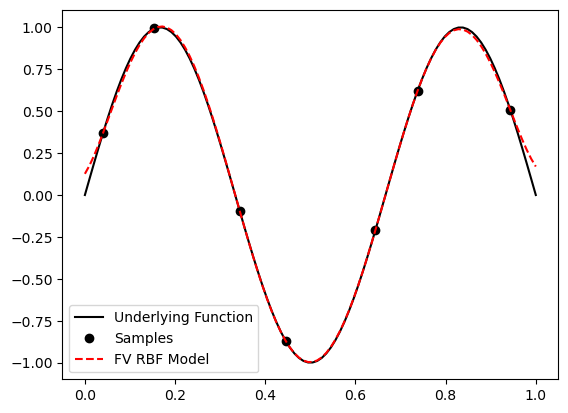

In [36]:
import matplotlib.pyplot as plt

plt.plot(x_test, func(x_test), 'k', label = 'Underlying Function')
plt.plot(X, y, 'ko', label = 'Samples')
plt.plot(x_test, y_pred, 'r--', label = 'FV RBF Model')
plt.legend()

## Gradient Enhanced models

In [24]:
from ge_rbf.rbf_models import RBFmodel #import the rbf model class
import numpy as np

func = lambda x: np.sin(3 * np.pi * x)
grad = lambda x: 3 * np.pi * np.cos(3 * np.pi * x)

X = lhs(1, samples = 7, criterion = 'm')#latin hypercube sampling, can be replaced with np.random
y = func(X)
dy = grad(X)

model = RBFmodel(X, y, dy = dy) #Create the model instance.
model.GE_fit(epsi = 0.1) #Fit the model and specify shape parameter of the kernels.

x_test = np.linspace(0, 1, 100).reshape(-1,1)

y_pred, dy_pred = model(x_test) #Sample from the model. By defualt both function and gradient information is returned. 
#y_pred = model(x_test, OnlyFunc=True) if only function information is required.

### Plot Results

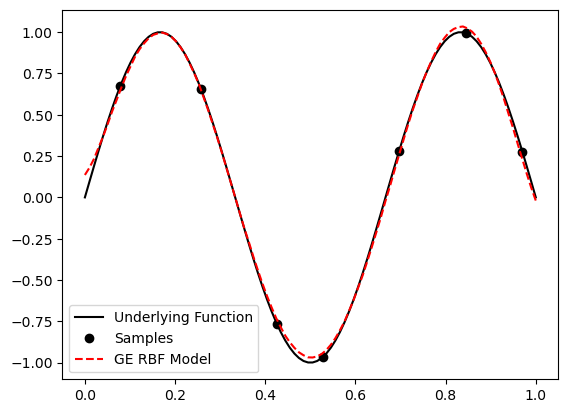

In [29]:
import matplotlib.pyplot as plt

plt.plot(x_test, func(x_test), 'k', label = 'Underlying Function')
plt.plot(X, y, 'ko', label = 'Samples')
plt.plot(x_test, y_pred, 'r--', label = 'GE RBF Model')
plt.legend()

## Gradient Only models

In [38]:
from ge_rbf.rbf_models import RBFmodel #import the rbf model class
import numpy as np

func = lambda x: np.sin(3 * np.pi * x)
grad = lambda x: 3 * np.pi * np.cos(3 * np.pi * x)

X = lhs(1, samples = 7, criterion = 'm')#latin hypercube sampling, can be replaced with np.random
y = func(X)
dy = grad(X)

model = RBFmodel(X, y, dy = dy) #Create the model instance.
model.GO_fit(X[0:1,:], y[0:1], epsi = 0.1) #Fit the model and specify, anchoring function value, its location, and shape parameter of the kernels.
# the anchoring value does not need to come from the dataset, it can be X = 0, y = 0 for example.

x_test = np.linspace(0, 1, 100).reshape(-1,1)

y_pred, dy_pred = model(x_test) #Sample from the model. By defualt both function and gradient information is returned. 
#y_pred = model(x_test, OnlyFunc=True) if only function information is required.

### Plot Results

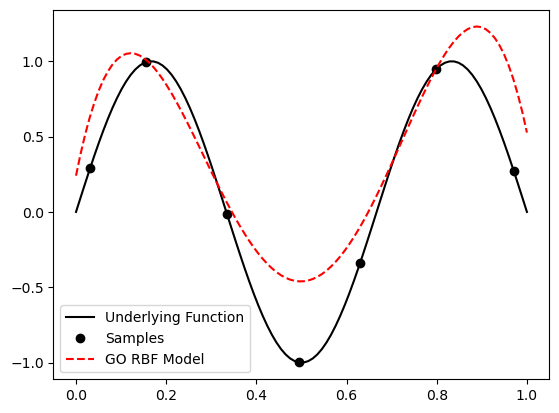

In [41]:
import matplotlib.pyplot as plt

plt.plot(x_test, func(x_test), 'k', label = 'Underlying Function')
plt.plot(X, y, 'ko', label = 'Samples')
plt.plot(x_test, y_pred, 'r--', label = 'GO RBF Model')
plt.legend()